## Author 
****
Karen Rugerio Armenta

## Business case
****
Understanding profitability in the US financial market

## Case Description
****
Give alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

Analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ.

Read the data dictionary to understand each variable and the dataset to understand its structure.

#Preparando la información del dataset para su procesamiento

## Libraries

In [245]:
#Libraries
import pandas as pd              
import matplotlib.pyplot as plt   
import numpy as np                
from sklearn import linear_model
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score, accuracy_score
from pyparsing import alphas
from pandas.core.api import DataFrame
import statsmodels.api as sm

In [246]:
#Extraction
from google.colab import drive
drive.mount("/content/gdrive")  
%cd "/content/gdrive/MyDrive/Colab Notebooks/Estadística - M1/final"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Estadística - M1/final


**Information obtained thanks to Yahoo Finance and NASDAQ**

##Firm Dataset

In [247]:
#Getting USA ticker info
dfusfirms2022 = pd.read_csv('usfirms2022.csv')
usfirms2022 = dfusfirms2022[['Ticker', 'Name', 'N', 'Class','Type of Asset', 'Sector NAICS\nlevel 1']]
dfusfirms2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticker                       3608 non-null   object
 1   Name                         3608 non-null   object
 2   N                            3608 non-null   int64 
 3   Class                        3608 non-null   object
 4   Country
of Origin            3608 non-null   object
 5   Type of Asset                3608 non-null   object
 6   Sector NAICS
level 1         3608 non-null   object
 7   Exchange / Src               3608 non-null   object
 8   Sector
Economatica           3608 non-null   object
 9   Sector NAICS
last available  3608 non-null   object
 10  partind                      3608 non-null   object
dtypes: int64(1), object(10)
memory usage: 310.2+ KB


In [248]:
#Getting firm quarter info
dfus2022q2a = pd.read_csv('us2022q2a.csv')
dfus2022q2a = dfus2022q2a[['firm', 'q','revenue','cogs','sgae', 'otheropexp','extraincome','finexp','incometax','totalassets', 'totalliabilities', 'shortdebt', 'longdebt', 'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding', 'fiscalmonth', 'year','cto']]
dfus2022q2a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324446 entries, 0 to 324445
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

In [249]:
#Making a single DataFrame
df = pd.merge(dfus2022q2a,dfusfirms2022, left_on='firm', right_on='Ticker')
df = df.drop(columns='Ticker')
#Getting last 4 info of each firm
ndf = df.groupby('firm').tail(4)
#Creating df1 for data that can be sum
df1 = ndf.iloc[:, 0:9]
#Gettin Sum of data 
df1.groupby('firm').sum()
#Created dataset for data that can't be sumed
df2 = ndf[['firm','totalassets','totalliabilities','shortdebt','longdebt', 'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding', 'fiscalmonth', 'year','cto','Name', 'N', 'Class','Type of Asset', 'Sector NAICS\nlevel 1']]
#Getting last data of this df (2022q2)
df2 = ndf.groupby('firm').tail(1)
df2
#Final dataframe. Ready to be processed 
fdf = pd.merge(df1,df2)
fdf.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2022q2,1607000.0,746000.0,501000.0,0.0,-7000.0,20000.0,59000.0,10455000.0,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,AA,2022q2,3644000.0,2767000.0,220000.0,-75000.0,81000.0,30000.0,234000.0,15709000.0,...,Alcoa Corp,127,Com,US,Stock,Manufacturing,NYSE,Basic & Fab Metal,Alumina and Aluminum Production and Processing,-
2,AAIC,2022q2,10900.0,6374.0,0.0,0.0,-3417.0,0.0,802.0,1084755.0,...,Arlington Asset Investment Corp,303,Com A,US,Stock,Finance and Insurance,NYSE,Funds,Other Investment Pools and Funds,-
3,AAL,2022q2,13422000.0,0.0,12405000.0,0.0,25000.0,439000.0,127000.0,67963000.0,...,American Airlines Group Inc,186,Com,US,Stock,Transportation and Warehousing,NASDAQ,Transportat Serv,Scheduled Air Transportation,0.032
4,AAME,2022q2,44669.0,0.0,46784.0,0.0,0.0,0.0,-436.0,379274.0,...,Atlantic American Corp,353,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Insurance Carriers,-


##Industry Dataset

In [250]:
#Names of the industries that exixst
industries = fdf['Sector NAICS\nlevel 1'].drop_duplicates()
industries

0                                           Manufacturing
2                                   Finance and Insurance
3                          Transportation and Warehousing
7                                            Retail Trade
12                                        Wholesale Trade
16      Administrative and Support and Waste Managemen...
21       Professional, Scientific, and Technical Services
32                      Health Care and Social Assistance
35                                            Information
46                     Real Estate and Rental and Leasing
66                                              Utilities
96                                           Construction
130            Agriculture, Forestry, Fishing and Hunting
221         Mining, Quarrying, and Oil and Gas Extraction
225                                  Educational Services
259                       Accommodation and Food Services
658                   Arts, Entertainment, and Recreation
823         Ot

In [251]:
#Getting average of information per industry
idf = fdf.groupby('Sector NAICS\nlevel 1', as_index = False).mean()
idf

,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,N
0,-,2.732860e+05,0.000000e+00,1.465760e+05,0.000000,0.000000,0.000000,1586.000000,1.308838e+07,7.383937e+06,NaN,NaN,5.704446e+06,13.287894,13.380000,394580.939000,6.000000,2022.0,2.0,2259.500000
1,Accommodation and Food Services,9.026466e+05,3.511268e+05,3.179792e+05,67705.558761,-1302.356388,38844.203910,34356.870313,6.046629e+06,5.532708e+06,1.384382e+05,3.993890e+06,5.139213e+05,58.957421,59.024420,121070.827942,6.279412,2022.0,2.0,1807.507246
2,Administrative and Support and Waste Managemen...,9.822946e+05,4.303990e+05,3.782419e+05,19639.843097,-41440.429683,17339.296315,31511.175492,8.141809e+06,5.322333e+06,2.657397e+05,2.369703e+06,2.819477e+06,69.340451,69.395045,162160.431263,6.290323,2022.0,2.0,1926.421053
3,"Agriculture, Forestry, Fishing and Hunting",1.464708e+06,9.871411e+05,2.435575e+05,17263.800000,18891.333333,19486.466667,46052.333333,8.096959e+06,4.467399e+06,3.514770e+05,1.809400e+06,3.629560e+06,38.814152,38.914375,140512.373187,7.400000,2022.0,2.0,1425.062500
4,"Arts, Entertainment, and Recreation",1.754730e+06,3.102139e+05,1.198005e+06,14720.210526,9500.213446,40259.855421,55107.350526,1.437185e+07,8.977436e+06,3.787172e+05,4.522159e+06,5.394410e+06,54.086190,54.086190,235538.697476,6.947368,2022.0,2.0,2088.619048
5,Construction,1.524832e+06,1.180135e+06,1.157836e+05,4921.865911,2065.861364,12484.831818,51839.304545,5.166023e+06,2.630502e+06,2.109438e+05,1.101475e+06,2.535521e+06,134.551594,134.599222,67872.855400,6.340909,2022.0,2.0,1859.377778
6,Educational Services,2.548345e+05,1.231059e+05,1.173320e+05,1096.857143,-8843.142857,3191.285714,5328.642857,1.643571e+06,7.503945e+05,3.281071e+04,3.973999e+05,8.931767e+05,63.599311,63.711450,59144.313571,7.071429,2022.0,2.0,1931.857143
7,Finance and Insurance,9.664427e+05,3.368577e+05,3.561712e+05,14475.624522,-78661.425938,9558.134075,33785.649772,4.790719e+07,4.242452e+07,9.364578e+05,5.205698e+06,5.482676e+06,54.089201,54.273872,150418.810350,6.018100,2022.0,2.0,1804.863053
8,Health Care and Social Assistance,8.623169e+05,2.505237e+05,5.329845e+05,104695.874542,-13737.728261,24063.319220,19732.016949,4.326147e+06,3.246001e+06,6.739446e+04,2.284431e+06,1.080145e+06,42.557440,42.602732,92659.290750,6.050847,2022.0,2.0,1713.921875
9,Information,1.314035e+06,5.083580e+05,5.679217e+05,27828.155724,2485.730535,37175.688650,46356.411760,1.289972e+07,8.686573e+06,5.104026e+05,4.583238e+06,4.213146e+06,54.615387,54.635524,288353.917759,5.914634,2022.0,2.0,1809.042146


#**General questions:**
###By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?




##**Firm Size Measures**

**There are two ways to get the Firm Size Measures. The first one is by getting the Book Value of the Firm using the formula:**

###**Book Value of the firm = (total assets - total liabilities)**

**First, we will see the Book Value by firm:**


In [252]:
#Book value formula at firm dataframe
fdf['bookValue'] = fdf['totalassets'] - fdf['totalliabilities']
fdf[['firm', 'Name','bookValue']].sort_values(by='bookValue',ascending=False).head()

,firm,Name,bookValue
1750,JPM,Jpmorgan Chase & Co,286143000.0
377,BAC,Bank Of America Corp,269118000.0
1399,GOOGL,Alphabet Inc,255419000.0
552,C,Citigroup Inc,199626000.0
3550,XOM,Exxon Mobil Corp,184508000.0


**The top indusrties based on book value are Jpmorgan Chase & Co, Bank Of America Corp and Alphabet Inc, belonging to JMP, BAC and GOOGL respectively**

**Here we can see how this information would look by plotting it**

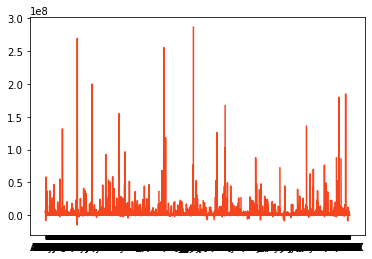

In [253]:
plt.plot(fdf.firm, fdf.bookValue, color='#F5451F')

**It's a bit difficult to see, as we have many firms, but this is how it looks like by firm. If we would like a better histogram we can do it by industry, then probably we could get information easier to analize.** 

**Then we'll get the Book Value by industry:**


In [254]:
#book value value formula at industry dataframe
idf['bookValue'] = idf['totalassets'] - idf['totalliabilities']
idf[['Sector NAICS\nlevel 1','bookValue']].sort_values(by='bookValue',ascending=False)

,Sector NAICS\nlevel 1,bookValue
17,Utilities,7.148295e+06
0,-,5.704446e+06
7,Finance and Insurance,5.482677e+06
4,"Arts, Entertainment, and Recreation",5.394410e+06
9,Information,4.213150e+06
3,"Agriculture, Forestry, Fishing and Hunting",3.629560e+06
13,"Professional, Scientific, and Technical Services",3.566048e+06
16,Transportation and Warehousing,3.536723e+06
15,Retail Trade,3.379848e+06
11,"Mining, Quarrying, and Oil and Gas Extraction",3.345942e+06


**If we plot it, it would look like this:**


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

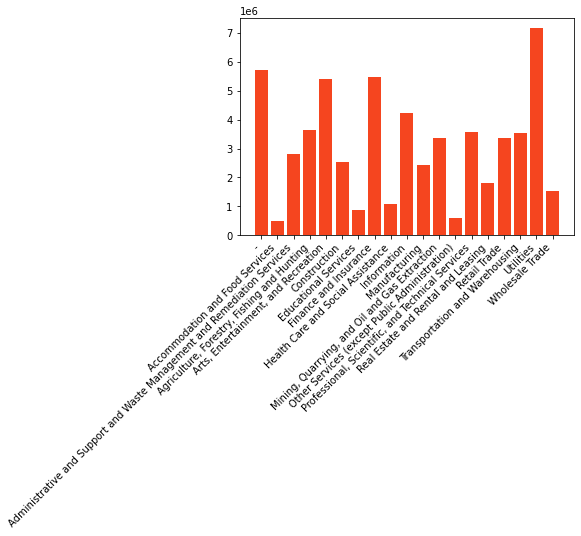

In [255]:
#Plot book value by industry 
plt.bar(idf['Sector NAICS\nlevel 1'], idf.bookValue, color='#F5451F')
plt.xticks(rotation = 45, ha = "right")

**Even though there are much less industries, is still a little bit difficult to interpret, but by the dataframe sorted, we can see that Utilities and Accommodation and Food Services	and Finance Ensurance are the top three industries by Book Value**

###Also, we can measure the firm size by getting the market value: 

##### **Market value = (historical stock price  * Number of shares)**

This can be translated as:

##### **Market value = (original price  * shares outstanding)**


Market value by firm

In [256]:
#Market value formula at firm dataframe
fdf['marketValue'] = fdf['originalprice'] * fdf['sharesoutstanding']
fdf[['firm','Name','marketValue']].sort_values(by='marketValue',ascending=False).dropna()

,firm,Name,marketValue
8,AAPL,Apple Inc,2.212838e+09
2125,MSFT,Microsoft Corp,1.920840e+09
1399,GOOGL,Alphabet Inc,1.435042e+09
201,AMZN,"Amazon.Com, Inc",1.080624e+09
3218,TSLA,"Tesla, Inc",6.976698e+08
...,...,...,...
3385,VLON,"Vallon Pharmaceuticals, Inc",4.358171e+03
1314,FWBI,"First Wave Biopharma, Inc",4.327068e+03
830,CTIB,Yunhong Cti Ltd.,4.225713e+03
3142,THMO,Thermogenesis Hldg Inc,3.539763e+03


**In terms of market value, we can see that Apple, Microsoft and Google have the top 3**

**To have a more general point of view, we can plot it:** 


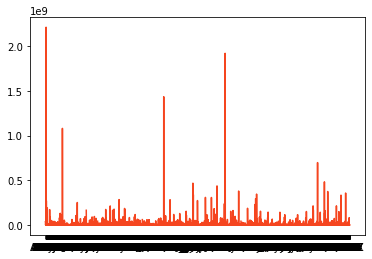

In [257]:
#plotting firms and its market value
plt.plot(fdf.firm, fdf.marketValue, color='#F5451F')

**And we can do the same by  industry**

In [258]:
#Market value formula at industry dataframe
idf['marketValue'] = idf['originalprice'] * idf['sharesoutstanding']
idf[['Sector NAICS\nlevel 1','marketValue']].sort_values(by='marketValue',ascending=False).head()

,Sector NAICS\nlevel 1,marketValue
17,Utilities,1.620144e+07
15,Retail Trade,1.609020e+07
9,Information,1.575437e+07
4,"Arts, Entertainment, and Recreation",1.273939e+07
16,Transportation and Warehousing,1.206613e+07


**If we plot this information, it would look like this:**


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

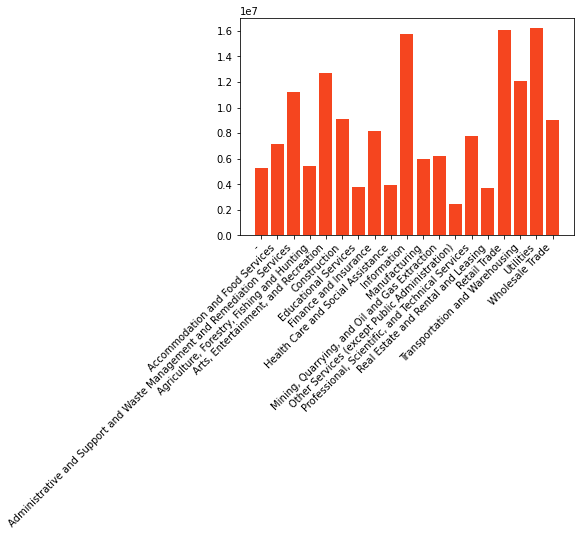

In [259]:
#plotting industries and its market value
plt.bar(idf['Sector NAICS\nlevel 1'], idf.marketValue, color='#F5451F')
plt.xticks(rotation = 45, ha = "right")

**This way to get the size of the firm give us so much information, because it consideres historical stock price and multiplies it by the number of assets. Looking at the results we can see that the bigest industries are Utilities, Retail Trade and Information**

##**Sales Performance**

The sales performance can be seen by checking the **sgae** that is the Sales and General Administrative Expenses

In [260]:
#Sales by industry
idf[['Sector NAICS\nlevel 1','sgae']].sort_values(by='sgae',ascending=False)

,Sector NAICS\nlevel 1,sgae
16,Transportation and Warehousing,1.783827e+06
4,"Arts, Entertainment, and Recreation",1.198005e+06
15,Retail Trade,1.108279e+06
17,Utilities,6.607086e+05
9,Information,5.679217e+05
8,Health Care and Social Assistance,5.329845e+05
13,"Professional, Scientific, and Technical Services",4.426325e+05
2,Administrative and Support and Waste Managemen...,3.782419e+05
7,Finance and Insurance,3.561712e+05
1,Accommodation and Food Services,3.179792e+05


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

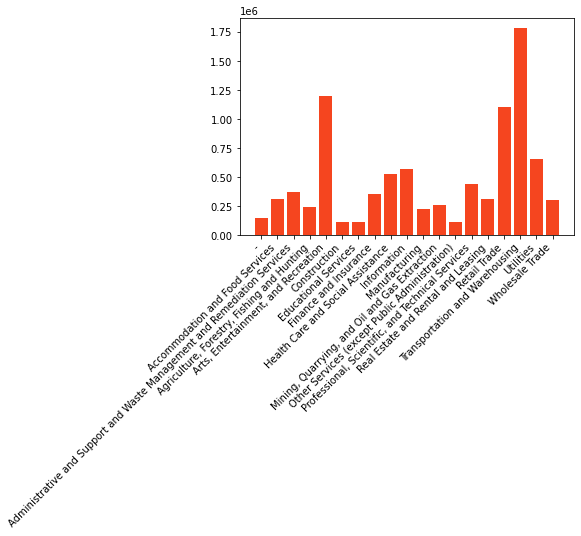

In [261]:
#Plot sales by industry
plt.bar(idf['Sector NAICS\nlevel 1'], idf.sgae, color='#F5451F')
plt.xticks(rotation = 45, ha = "right")

**We can observe a big difference between industries' sales. Thanks to the chart, we can see a big difference between the top 3 and the rest of the industries. In this section it's also shown that the industries that sells the most are "Transportation and Warehousing Arts, Entertainment, and Recreation and Retail Trade"**

**Now, let's do the seme by firm**

In [262]:
#Sales by firm
fdf[['firm','Name','sgae','Sector NAICS\nlevel 1']].sort_values(by='sgae',ascending=False).dropna().head()

,firm,Name,sgae,Sector NAICS\nlevel 1
201,AMZN,"Amazon.Com, Inc",51403000.0,Retail Trade
3495,WMT,Walmart Inc,29404000.0,Retail Trade
1201,FDX,Fedex Corp,22470000.0,Transportation and Warehousing
3307,UPS,"United Parcel Service, Inc",21231000.0,Transportation and Warehousing
1399,GOOGL,Alphabet Inc,20128000.0,"Professional, Scientific, and Technical Services"


**Amazingly, by firm we can see that Amazon is the biggest seller firm, what could explain the retail trade position of the firm, it is a huge difference in Amazon sales compared to the rest. In second place we have Walmart, and in third place it's Fedex. Being the top 3 sellers in USA. Amazingly Google is placed in 5th place, even though has amazing results in size**

##Profitability

The fromula to get the Profit Margin Measures is by getting the Operating profit margin. 
The formula to get it is: 

**Operating profit margin = ebit/revenue**

And to get the ebit (Earnings before Interest and Taxes) also known as Operating profit, we will use the following formula:

**ebit = revenue - cogs - sgae - otheropexp**



In [263]:
#First we will get the firm ebit
fdf['ebit'] = fdf.revenue - fdf.cogs - fdf.sgae - fdf.otheropexp
fdf[['firm','Name','ebit']].sort_values(by='ebit',ascending=False).dropna().head()

,firm,Name,ebit
8,AAPL,Apple Inc,23076000.0
3550,XOM,Exxon Mobil Corp,20831000.0
2125,MSFT,Microsoft Corp,20534000.0
1399,GOOGL,Alphabet Inc,19453000.0
871,CVX,Chevron Corp,16119000.0


In [264]:
#Then we will get the industry ebit
idf['ebit'] = idf.revenue - idf.cogs - idf.sgae - idf.otheropexp
idf[['Sector NAICS\nlevel 1','ebit']].sort_values(by='ebit',ascending=False).dropna().head()

,Sector NAICS\nlevel 1,ebit
11,"Mining, Quarrying, and Oil and Gas Extraction",454300.907131
16,Transportation and Warehousing,307658.675181
15,Retail Trade,283505.750026
7,Finance and Insurance,258938.183369
4,"Arts, Entertainment, and Recreation",231790.308633


**Having this, we proceeded to get the Profit Margin Measures**

To avoid  infinite3 results, we apply the condition != 0 which means it will only do this if the revenue is different to 0 in the denominator.

In [265]:
#First by industry:
#By apllying the condition != 0 we avoid having infinite numbers, as there are many firms with 0 in the revenue value
idf['ipmm'] = idf.ebit / (idf.revenue != 0)
idf[['Sector NAICS\nlevel 1','ipmm']].sort_values(by='ipmm',ascending=False).dropna().head()

,Sector NAICS\nlevel 1,ipmm
11,"Mining, Quarrying, and Oil and Gas Extraction",454300.907131
16,Transportation and Warehousing,307658.675181
15,Retail Trade,283505.750026
7,Finance and Insurance,258938.183369
4,"Arts, Entertainment, and Recreation",231790.308633


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

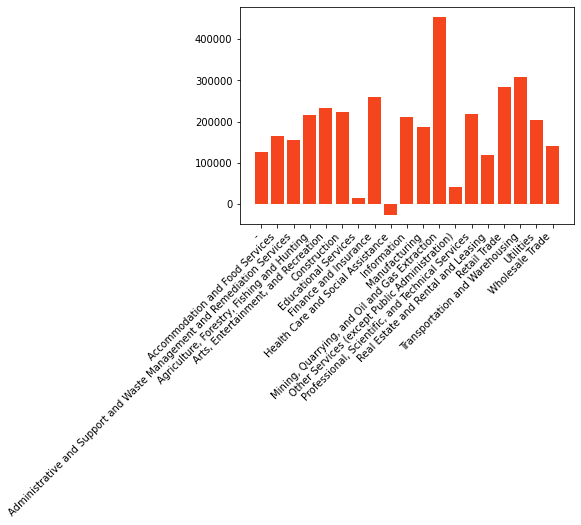

In [328]:
plt.bar(idf['Sector NAICS\nlevel 1'], idf.ipmm, color='#F5451F')
plt.xticks(rotation = 45, ha = "right")

**Here, we can see that the industries that have more profits are 'Mining, Quarrying, and Oil and Gas Extraction, Finance and Insurance, Professional, Scientific, and Accommodation and Food Services' This could be because producing this kind of industries is not that expensive and some things sell so high. Another point of view is that they are mostly services, so clients pay even when they don't use it like insurance. Also, we see a negative at health care and social assistance, as these are social industries**

**In this part we don't see many of the previous industries we have seen in sells or size**

In [267]:
#Then by firm:
#The condition != will help us avoid infinite numbers by only dividing when the revenue is different from 0 
fdf['ipmm'] = fdf.ebit / (fdf.revenue != 0)
fdf[['firm','Name','ipmm', 'Sector NAICS\nlevel 1']].dropna().head()

,firm,Name,ipmm,Sector NAICS\nlevel 1
0,A,"Agilent Technologies, Inc",360000.0,Manufacturing
1,AA,Alcoa Corp,732000.0,Manufacturing
2,AAIC,Arlington Asset Investment Corp,4526.0,Finance and Insurance
3,AAL,American Airlines Group Inc,1017000.0,Transportation and Warehousing
4,AAME,Atlantic American Corp,-2115.0,Finance and Insurance


**Most firms are Manufacturing and Finance**

###Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

**First of all, I would like to order the info that is already clean based on the industry**

In [268]:
#Top 5 book value by industry
idf[['Sector NAICS\nlevel 1','bookValue']].sort_values(by='bookValue',ascending=False).head()

,Sector NAICS\nlevel 1,bookValue
17,Utilities,7.148295e+06
0,-,5.704446e+06
7,Finance and Insurance,5.482677e+06
4,"Arts, Entertainment, and Recreation",5.394410e+06
9,Information,4.213150e+06


In [269]:
#Top 5 market value by industry
idf[['Sector NAICS\nlevel 1','marketValue']].sort_values(by='marketValue',ascending=False).head()

,Sector NAICS\nlevel 1,marketValue
17,Utilities,1.620144e+07
15,Retail Trade,1.609020e+07
9,Information,1.575437e+07
4,"Arts, Entertainment, and Recreation",1.273939e+07
16,Transportation and Warehousing,1.206613e+07


**As we can see, the most profitable indusrty, talking about book value and market value is the Utilities industy, as it has the biggest profits. Then we have the information industry, that even when is the last one in the top 5 of book value, we can see that also appears in the market value. Making it one of the only two that repeats this pattern.**

**Now, let's do the same, but now analizing the firms:**

In [270]:
#Top 5 book value by firm
fdf[['firm','Sector NAICS\nlevel 1','bookValue']].sort_values(by='bookValue',ascending=False).head()

,firm,Sector NAICS\nlevel 1,bookValue
1750,JPM,Finance and Insurance,286143000.0
377,BAC,Finance and Insurance,269118000.0
1399,GOOGL,"Professional, Scientific, and Technical Services",255419000.0
552,C,Finance and Insurance,199626000.0
3550,XOM,Manufacturing,184508000.0


In [271]:
#Top 5 market value by firm
fdf[['firm','Sector NAICS\nlevel 1','marketValue']].sort_values(by='marketValue',ascending=False).head()

,firm,Sector NAICS\nlevel 1,marketValue
8,AAPL,Manufacturing,2.212838e+09
2125,MSFT,Information,1.920840e+09
1399,GOOGL,"Professional, Scientific, and Technical Services",1.435042e+09
201,AMZN,Retail Trade,1.080624e+09
3218,TSLA,Manufacturing,6.976698e+08


**It is amazing how the same firm, can have different results in book value and market value, making it less profitable, or more profitable. In this case, the only firm that seems to know how to balance is GOOGLE, because results shows it in the 3rd place at book and market value**

**As we can see, the firms with the highest market value are Apple, Microsoft and Google** 

###Show how many firms by industry there are in the sample

In [272]:
#Getting firms by industry
fbi = fdf[['firm','Sector NAICS\nlevel 1']].groupby(by=['Sector NAICS\nlevel 1']).count().reset_index()
fbi

,Sector NAICS\nlevel 1,firm
0,-,2
1,Accommodation and Food Services,69
2,Administrative and Support and Waste Managemen...,133
3,"Agriculture, Forestry, Fishing and Hunting",16
4,"Arts, Entertainment, and Recreation",21
5,Construction,45
6,Educational Services,14
7,Finance and Insurance,701
8,Health Care and Social Assistance,64
9,Information,261


**With this code we can see how many firms are by industry**

##For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

**To answer this question I would like to plot the results ordered so we can have a better look of how industries and firms are distributed**

**First, we will start wit the Book value:**

Firt let's calculate the book value median, and the market value median

In [273]:
fdf['marketValueMedian'] = fdf['marketValue'].median()
fdf['bookValueMedian'] = fdf['bookValue'].median()
firmsize = fdf[['Sector NAICS\nlevel 1','firm','bookValue','bookValueMedian','marketValue','marketValueMedian']]
firmsize

,Sector NAICS\nlevel 1,firm,bookValue,bookValueMedian,marketValue,marketValueMedian
0,Manufacturing,A,5122000.000,457737.0,3.547756e+07,1.105076e+06
1,Manufacturing,AA,7292000.000,457737.0,8.407171e+06,1.105076e+06
2,Finance and Insurance,AAIC,213698.000,457737.0,1.138033e+05,1.105076e+06
3,Transportation and Warehousing,AAL,-8422000.000,457737.0,8.235848e+06,1.105076e+06
4,Finance and Insurance,AAME,109101.000,457737.0,5.446399e+04,1.105076e+06
...,...,...,...,...,...,...
3595,Manufacturing,ZVIA,87199.000,457737.0,1.888586e+05,1.105076e+06
3596,Educational Services,ZVO,6605.000,457737.0,3.307650e+04,1.105076e+06
3597,Manufacturing,ZWS,229400.000,457737.0,3.431356e+06,1.105076e+06
3598,"Professional, Scientific, and Technical Services",ZY,236623.000,457737.0,1.268631e+05,1.105076e+06


In [274]:
industryMarketValueMedia = firmsize.groupby('Sector NAICS\nlevel 1',as_index=True)['marketValue'].median().reset_index()
industryBookValueMedia = firmsize.groupby('Sector NAICS\nlevel 1',as_index=True)['bookValue'].median().reset_index()

Now, I'm going to calculate the Market Value median by Industry

In [275]:
industryDontKnowMedia = industryMarketValueMedia.loc[0].marketValue
industryAccommodationMedia = industryMarketValueMedia.loc[1].marketValue
industryAdministrativeMedia = industryMarketValueMedia.loc[2].marketValue
industryAgricultureMedia = industryMarketValueMedia.loc[3].marketValue
industryArtsMedia = industryMarketValueMedia.loc[4].marketValue
industryConstructionMedia = industryMarketValueMedia.loc[5].marketValue
industryEducationalMedia = industryMarketValueMedia.loc[6].marketValue
industryFinanceMedia = industryMarketValueMedia.loc[7].marketValue
industryHealthMedia = industryMarketValueMedia.loc[8].marketValue
industryInformationMedia = industryMarketValueMedia.loc[9].marketValue
industryManufacturingMedia = industryMarketValueMedia.loc[10].marketValue
industryMiningMedia = industryMarketValueMedia.loc[11].marketValue
industryOtherMedia = industryMarketValueMedia.loc[12].marketValue
industryProfessionalMedia = industryMarketValueMedia.loc[13].marketValue
industryRealEstateMedia = industryMarketValueMedia.loc[14].marketValue
industryRetailMedia = industryMarketValueMedia.loc[15].marketValue
industryTransportationMedia = industryMarketValueMedia.loc[16].marketValue
industryUtilitiesMedia = industryMarketValueMedia.loc[17].marketValue
industryWholesaleMedia = industryMarketValueMedia.loc[18].marketValue

In [276]:
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == '-', 'industryMarketValueMedian'] = industryDontKnowMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Accommodation and Food Services', 'industryMarketValueMedian'] = industryAccommodationMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Administrative and Support and Waste Management', 'industryMarketValueMedian'] = industryAdministrativeMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting', 'industryMarketValueMedian'] = industryAgricultureMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation', 'industryMarketValueMedian'] = industryArtsMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Construction', 'industryMarketValueMedian'] = industryConstructionMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Educational Services', 'industryMarketValueMedian'] = industryEducationalMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Finance and Insurance', 'industryMarketValueMedian'] = industryFinanceMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance', 'industryMarketValueMedian'] = industryHealthMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Information', 'industryMarketValueMedian'] = industryInformationMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Manufacturing', 'industryMarketValueMedian'] = industryManufacturingMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction', 'industryMarketValueMedian'] = industryMiningMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Other Services (except Public Administration)', 'industryMarketValueMedian'] = industryOtherMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Professional, Scientific, and Technical Services', 'industryMarketValueMedian'] = industryProfessionalMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing', 'industryMarketValueMedian'] = industryRealEstateMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Retail Trade', 'industryMarketValueMedian'] = industryRetailMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing', 'industryMarketValueMedian'] = industryTransportationMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Utilities', 'industryMarketValueMedian'] = industryUtilitiesMedia
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Wholesale Trade', 'industryMarketValueMedian'] = industryWholesaleMedia
#firmsize['size'].loc[firmsize['size'] == 'Manufacturing'] = 10
firmsize

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Sector NAICS\nlevel 1,firm,bookValue,bookValueMedian,marketValue,marketValueMedian,industryMarketValueMedian
0,Manufacturing,A,5122000.000,457737.0,3.547756e+07,1.105076e+06,5.911289e+05
1,Manufacturing,AA,7292000.000,457737.0,8.407171e+06,1.105076e+06,5.911289e+05
2,Finance and Insurance,AAIC,213698.000,457737.0,1.138033e+05,1.105076e+06,1.264517e+06
3,Transportation and Warehousing,AAL,-8422000.000,457737.0,8.235848e+06,1.105076e+06,2.464494e+06
4,Finance and Insurance,AAME,109101.000,457737.0,5.446399e+04,1.105076e+06,1.264517e+06
...,...,...,...,...,...,...,...
3595,Manufacturing,ZVIA,87199.000,457737.0,1.888586e+05,1.105076e+06,5.911289e+05
3596,Educational Services,ZVO,6605.000,457737.0,3.307650e+04,1.105076e+06,1.524843e+06
3597,Manufacturing,ZWS,229400.000,457737.0,3.431356e+06,1.105076e+06,5.911289e+05
3598,"Professional, Scientific, and Technical Services",ZY,236623.000,457737.0,1.268631e+05,1.105076e+06,9.419611e+05


And now, I'm going to calculate the Book Value median by Industry

In [277]:
industryDontKnowMediaBV = industryBookValueMedia.loc[0].bookValue
industryAccommodationMediaBV = industryBookValueMedia.loc[1].bookValue
industryAdministrativeMediaBV = industryBookValueMedia.loc[2].bookValue
industryAgricultureMediaBV = industryBookValueMedia.loc[3].bookValue
industryArtsMediaBV = industryBookValueMedia.loc[4].bookValue
industryConstructionMediaBV = industryBookValueMedia.loc[5].bookValue
industryEducationalMediaBV = industryBookValueMedia.loc[6].bookValue
industryFinanceMediaBV = industryBookValueMedia.loc[7].bookValue
industryHealthMediaBV = industryBookValueMedia.loc[8].bookValue
industryInformationMediaBV = industryBookValueMedia.loc[9].bookValue
industryManufacturingMediaBV = industryBookValueMedia.loc[10].bookValue
industryMiningMediaBV = industryBookValueMedia.loc[11].bookValue
industryOtherMediaBV = industryBookValueMedia.loc[12].bookValue
industryProfessionalMediaBV = industryBookValueMedia.loc[13].bookValue
industryRealEstateMediaBV = industryBookValueMedia.loc[14].bookValue
industryRetailMediaBV = industryBookValueMedia.loc[15].bookValue
industryTransportationMediaBV = industryBookValueMedia.loc[16].bookValue
industryUtilitiesMediaBV = industryBookValueMedia.loc[17].bookValue
industryWholesaleMediaBV = industryBookValueMedia.loc[18].bookValue
industryWholesaleMediaBV

683900.0

In [278]:
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == '-', 'industryBookValueMedian'] = industryDontKnowMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Accommodation and Food Services', 'industryBookValueMedian'] = industryAccommodationMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Administrative and Support and Waste Management', 'industryBookValueMedian'] = industryAdministrativeMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting', 'industryBookValueMedian'] = industryAgricultureMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation', 'industryBookValueMedian'] = industryArtsMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Construction', 'industryBookValueMedian'] = industryConstructionMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Educational Services', 'industryBookValueMedian'] = industryEducationalMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Finance and Insurance', 'industryBookValueMedian'] = industryFinanceMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance', 'industryBookValueMedian'] = industryHealthMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Information', 'industryBookValueMedian'] = industryInformationMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Manufacturing', 'industryBookValueMedian'] = industryManufacturingMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction', 'industryBookValueMedian'] = industryMiningMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Other Services (except Public Administration)', 'industryBookValueMedian'] = industryOtherMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Professional, Scientific, and Technical Services', 'industryBookValueMedian'] = industryProfessionalMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing', 'industryBookValueMedian'] = industryRealEstateMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Retail Trade', 'industryBookValueMedian'] = industryRetailMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing', 'industryBookValueMedian'] = industryTransportationMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Utilities', 'industryBookValueMedian'] = industryUtilitiesMediaBV
firmsize.loc[firmsize['Sector NAICS\nlevel 1'] == 'Wholesale Trade', 'industryBookValueMedian'] = industryWholesaleMediaBV
#firmsize['size'].loc[firmsize['size'] == 'Manufacturing'] = 10
firmsize[['Sector NAICS\nlevel 1','firm','industryMarketValueMedian','industryBookValueMedian']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Sector NAICS\nlevel 1,firm,industryMarketValueMedian,industryBookValueMedian
0,Manufacturing,A,5.911289e+05,244642.0
1,Manufacturing,AA,5.911289e+05,244642.0
2,Finance and Insurance,AAIC,1.264517e+06,1049158.0
3,Transportation and Warehousing,AAL,2.464494e+06,1288121.5
4,Finance and Insurance,AAME,1.264517e+06,1049158.0
...,...,...,...,...
3595,Manufacturing,ZVIA,5.911289e+05,244642.0
3596,Educational Services,ZVO,1.524843e+06,649699.0
3597,Manufacturing,ZWS,5.911289e+05,244642.0
3598,"Professional, Scientific, and Technical Services",ZY,9.419611e+05,279188.0


To get the size I'll compare the results by industry with the general media of both Market Value and Book value variables

In [279]:
firmsize['sizeMarketValueMedian'] = firmsize['industryMarketValueMedian'] - firmsize['marketValueMedian']
firmsize['sizeBookValueMedian'] = firmsize['industryBookValueMedian'] - firmsize['bookValueMedian']
firmsize[['Sector NAICS\nlevel 1','firm','sizeMarketValueMedian','sizeBookValueMedian']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sector NAICS\nlevel 1,firm,sizeMarketValueMedian,sizeBookValueMedian
0,Manufacturing,A,-5.139470e+05,-213095.0
1,Manufacturing,AA,-5.139470e+05,-213095.0
2,Finance and Insurance,AAIC,1.594415e+05,591421.0
3,Transportation and Warehousing,AAL,1.359418e+06,830384.5
4,Finance and Insurance,AAME,1.594415e+05,591421.0
...,...,...,...,...
3595,Manufacturing,ZVIA,-5.139470e+05,-213095.0
3596,Educational Services,ZVO,4.197672e+05,191962.0
3597,Manufacturing,ZWS,-5.139470e+05,-213095.0
3598,"Professional, Scientific, and Technical Services",ZY,-1.631148e+05,-178549.0


Let's plot the market value size

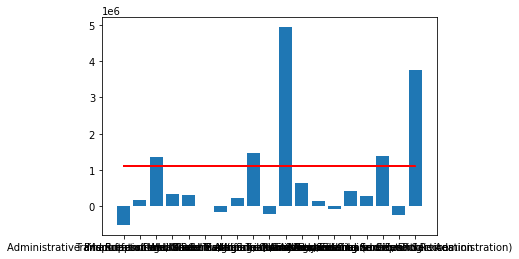

In [280]:
plt.bar(firmsize['Sector NAICS\nlevel 1'],firmsize['sizeMarketValueMedian'])
plt.plot(firmsize['Sector NAICS\nlevel 1'], firmsize['marketValueMedian'], color='red')

In red we can see the median of market value of all industries, and as we can see, only 5 industries are bigger, while there are 5 industries under 0  and the rest above 0 but under the media

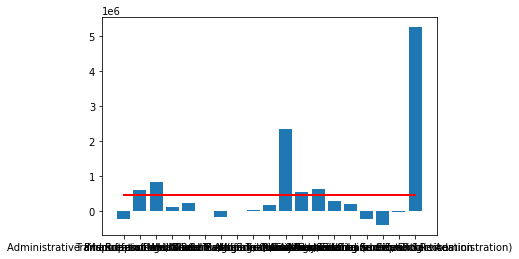

In [281]:
plt.bar(firmsize['Sector NAICS\nlevel 1'],firmsize['sizeBookValueMedian'])
plt.plot(firmsize['Sector NAICS\nlevel 1'], firmsize['bookValueMedian'], color='red')

In this graph we can see that the media is lower, and many industries are above the media, which means most industries are more book valuable. Also there are less industries under 0 book value. Most of them keep over 0 and around or even over the media

##For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

**A)The descriptive statistics of profit margin**
**The formula for getting this information is:**
- **ipmm = ebit/revenue**

**Now, let's calculate it by industry:**

In [282]:
#Ebits
fdf['ebit'] = fdf.revenue - fdf.cogs - fdf.sgae - fdf.otheropexp
idf['ebit'] = idf.revenue - idf.cogs - idf.sgae - idf.otheropexp

In [283]:
#First by industry:
#By adding != we avoid infinite numbers, as only do this when revenue is differet from 0
idf['ipmm'] = idf.ebit / (idf.revenue != 0) 
idf[['Sector NAICS\nlevel 1','ipmm']]

,Sector NAICS\nlevel 1,ipmm
0,-,126710.000000
1,Accommodation and Food Services,165835.021376
2,Administrative and Support and Waste Managemen...,154013.838609
3,"Agriculture, Forestry, Fishing and Hunting",216746.000000
4,"Arts, Entertainment, and Recreation",231790.308633
5,Construction,223991.431816
6,Educational Services,13299.714286
7,Finance and Insurance,258938.183369
8,Health Care and Social Assistance,-25887.152894
9,Information,209927.408021


**By firm**

In [284]:
#Then by firm:
#We again apply the condition to avoid infinite numbers
fdf['ipmm'] = fdf.ebit / (fdf.revenue != 0) 
fdf[['firm','Name','ipmm', 'Sector NAICS\nlevel 1']]

,firm,Name,ipmm,Sector NAICS\nlevel 1
0,A,"Agilent Technologies, Inc",360000.0,Manufacturing
1,AA,Alcoa Corp,732000.0,Manufacturing
2,AAIC,Arlington Asset Investment Corp,4526.0,Finance and Insurance
3,AAL,American Airlines Group Inc,1017000.0,Transportation and Warehousing
4,AAME,Atlantic American Corp,-2115.0,Finance and Insurance
...,...,...,...,...
3595,ZVIA,Zevia Pbc,-14743.0,Manufacturing
3596,ZVO,Zovio Inc,-841.0,Educational Services
3597,ZWS,Zurn Elkay Water Solutions Corp,53500.0,Manufacturing
3598,ZY,Zymergen Inc,-106196.0,"Professional, Scientific, and Technical Services"


**b) plot(s) to illustrate how profit margin changes across industries**

**As we already made an analysis of Profit margin, the best way to see how they distribute is making a plot too**

By industry

<BarContainer object of 19 artists>

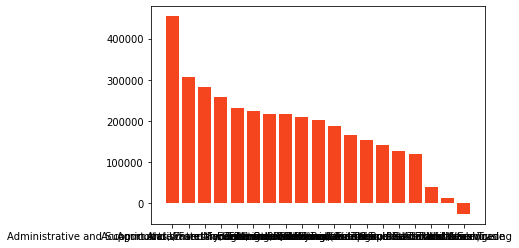

In [285]:
#Profits by industry
plt.bar(idf['Sector NAICS\nlevel 1'], idf['ipmm'].sort_values(ascending=False), color='#F5451F')

**Now we can see that we have a better distribution. It is skewed to the left, but there is no much variance as in the others. Most of the values are found in the middle, between 0.1 and 0.2**

##Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

**Let's get the market values by firm, order them by size, and then get the mean of market value, and see the difference:**

In [286]:
#Top 10 market value by firm
fdf['mn'] = fdf['marketValue'].mean()
fdf['difference'] = fdf['marketValue'] - fdf['mn']
ttmv = fdf[['firm','Name','marketValue','mn','difference']].sort_values(by='marketValue',ascending=False).head(10)
ttmv

,firm,Name,marketValue,mn,difference
8,AAPL,Apple Inc,2.212838e+09,1.095980e+07,2.201878e+09
2125,MSFT,Microsoft Corp,1.920840e+09,1.095980e+07,1.909880e+09
1399,GOOGL,Alphabet Inc,1.435042e+09,1.095980e+07,1.424083e+09
201,AMZN,"Amazon.Com, Inc",1.080624e+09,1.095980e+07,1.069664e+09
3218,TSLA,"Tesla, Inc",6.976698e+08,1.095980e+07,6.867100e+08
3299,UNH,Unitedhealth Group Inc,4.818731e+08,1.095980e+07,4.709133e+08
1744,JNJ,Johnson & Johnson,4.671001e+08,1.095980e+07,4.561403e+08
2029,META,"Meta Platforms, Inc",4.363946e+08,1.095980e+07,4.254348e+08
2285,NVDA,Nvidia Corp,3.789750e+08,1.095980e+07,3.680152e+08
3338,V,Visa Inc,3.743426e+08,1.095980e+07,3.633828e+08


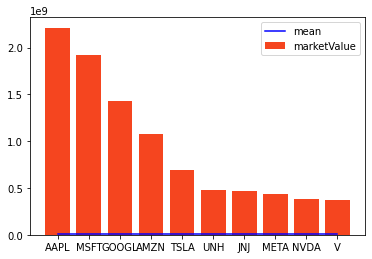

In [287]:
plt.plot(ttmv['firm'],ttmv.mn,color="blue")
plt.bar(ttmv['firm'],ttmv.marketValue,color="#F5451F")
plt.legend(['mean', 'marketValue'])

**I thik that by plotting them, we can get a better interpretation of how far are industries from the mean (the mean is shown with a blue line), therefore we can see that all of them are above the media for a lot**

##Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?



**Here we can see the top 10 US firms in terms of book value, the mean and the difference from the media**

In [288]:
#Top 10 book value by firm
fdf['mean'] = fdf['bookValue'].mean()
fdf['difference'] = fdf['bookValue'] - fdf['mean']
ttbv = fdf[['firm','Name','bookValue','mean','difference']].sort_values(by='bookValue',ascending=False).head(10)
ttbv

,firm,Name,bookValue,mean,difference
1750,JPM,Jpmorgan Chase & Co,286143000.0,3.331749e+06,2.828113e+08
377,BAC,Bank Of America Corp,269118000.0,3.331749e+06,2.657863e+08
1399,GOOGL,Alphabet Inc,255419000.0,3.331749e+06,2.520873e+08
552,C,Citigroup Inc,199626000.0,3.331749e+06,1.962943e+08
3550,XOM,Exxon Mobil Corp,184508000.0,3.331749e+06,1.811763e+08
3470,WFC,Wells Fargo & Company,179793000.0,3.331749e+06,1.764613e+08
2125,MSFT,Microsoft Corp,166542000.0,3.331749e+06,1.632103e+08
871,CVX,Chevron Corp,154562000.0,3.331749e+06,1.512303e+08
3086,T,AT&T Inc,135307000.0,3.331749e+06,1.319753e+08
201,AMZN,"Amazon.Com, Inc",131402000.0,3.331749e+06,1.280703e+08


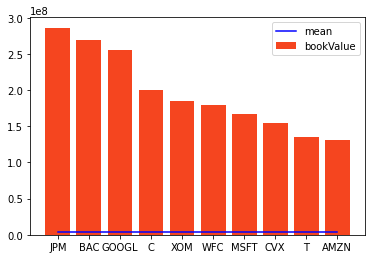

In [289]:
plt.plot(ttbv['firm'],ttbv['mean'],color="blue")
plt.bar(ttbv['firm'],ttbv.bookValue,color="#F5451F")
plt.legend(['mean', 'bookValue'])

**We can see that all the top 10 of the firms are above the media too but it seems to be less variance between the book value of the firms**

#2.2.1.2 Considering the **whole history** of financial data for all firms:
###**How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics**



**First, let's create a new dataset to work these values, as we are going to work with the historical data and not only with the last 4 quarters, and only for the Financial Service**

In [290]:
#Creating the dataset of Financial Service
financialData = pd.DataFrame(financialData.loc[financialData['Sector\nEconomatica'] == 'Finance and Insurance'])
financialData 
financialData[['q', 'Name' ,'Sector\nEconomatica','Sector NAICS\nlast available']]
#Defining the firm as an index
financialData['qdate'] = pd.PeriodIndex(financialData['q'], freq="Q")
financialData

q   revenue     cogs  sgae  otheropexp  extraincome  finexp  \
firm qdate                                                                      
AAME 2000Q1  2000q1       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q2  2000q2       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q3  2000q3       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q4  2000q4       NaN      NaN   NaN         NaN          NaN     NaN   
     2001Q1  2001q1       NaN      NaN   NaN         NaN          NaN     NaN   
...             ...       ...      ...   ...         ...          ...     ...   
ZION 2021Q2  2021q2  570000.0  15000.0   0.0         0.0    -100000.0     0.0   
     2021Q3  2021q3  569000.0  14000.0   0.0         0.0    -244000.0     0.0   
     2021Q4  2021q4  566000.0  13000.0   0.0         0.0    -284000.0     0.0   
     2022Q1  2022q1  555000.0  11000.0   0.0         0.0    -289000.0     0.0   
     2022Q2  2022q2  608000.0  15000.0   0.0         0.0    -333000.0     0.0   

             incometax  totalassets  totalliabilities  ...  \
firm qdate                                             ...   
AAME 2000Q1        NaN          NaN               NaN  ...   
     2000Q2        NaN          NaN               NaN  ...   
     2000Q3        NaN          NaN               NaN  ...   
     2000Q4        NaN          NaN               NaN  ...   
     2001Q1        NaN          NaN               NaN  ...   
...                ...          ...               ...  ...   
ZION 2021Q2   101000.0   87208000.0        79175000.0  ...   
     2021Q3    71000.0   88306000.0        80532000.0  ...   
     2021Q4    56000.0   93200000.0        85737000.0  ...   
     2022Q1    52000.0   91126000.0        84832000.0  ...   
     2022Q2    57000.0   87784000.0        82152000.0  ...   

             shortFinancialLeverage  longFinancialLeverage  netincome  \
firm qdate                                                              
AAME 2000Q1                     NaN                    NaN        NaN   
     2000Q2                     NaN                    NaN        NaN   
     2000Q3                     NaN                    NaN        NaN   
     2000Q4                     NaN                    NaN        NaN   
     2001Q1                     NaN                    NaN        NaN   
...                             ...                    ...        ...   
ZION 2021Q2                     NaN               0.014999   354000.0   
     2021Q3                     NaN               0.011551   240000.0   
     2021Q4                     NaN               0.010858   213000.0   
     2022Q1                     NaN               0.007561   203000.0   
     2022Q2                     NaN               0.007644   203000.0   

                  EPS      EPSP         r  new_sgae   new_rev   qdate  \
firm qdate                                                              
AAME 2000Q1       NaN       NaN       NaN       NaN       NaN  2000Q1   
     2000Q2       NaN       NaN       NaN       NaN       NaN  2000Q2   
     2000Q3       NaN       NaN       NaN       NaN       NaN  2000Q3   
     2000Q4       NaN       NaN       NaN       NaN       NaN  2000Q4   
     2001Q1       NaN       NaN       NaN       NaN       NaN  2001Q1   
...               ...       ...       ...       ...       ...     ...   
ZION 2021Q2  2.160966  0.040881  3.865836       0.0  570000.0  2021Q2   
     2021Q3  1.480837  0.023927  4.043881       0.0  569000.0  2021Q3   
     2021Q4  1.361340  0.021554  4.064594       0.0  566000.0  2021Q4   
     2022Q1  1.339277  0.020428  4.105692       0.0  555000.0  2022Q1   
     2022Q2  1.341184  0.026349  3.841823       0.0  608000.0  2022Q2   

            new_operatingMargin  
firm qdate                       
AAME 2000Q1                 NaN  
     2000Q2                 NaN  
     2000Q3                 NaN  
     2000Q4                 NaN  
     2001Q1                 NaN  
...                

##**Number 1**
**The first formula we are going to use to measure firm profitability among firms will be the operating profit margin. The formula for doing that is the following:**

- **Operating profit margin = ebit / revenue**

**It is important to highlight that all the data we are going to work is going to be winsorized. I decided to do so to get better results; to control outliers and of course, to get more understandable plots of the information**

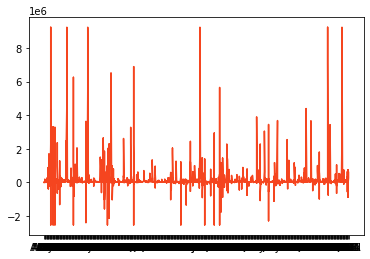

In [291]:
#Getting the operating margin
financialData['ebit'] = financialData.revenue - financialData.cogs - financialData.sgae - financialData.otheropexp
financialData['operatingMargin'] = financialData.ebit / (financialData.revenue != 0)
#Create a temporary dataset to work the information
financialDataOM = financialData
#Drop infinite data
financialDataOM['operatingMargin'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the 1% percentile high
largest = financialDataOM['operatingMargin'].quantile(.99)
#And the low value as the 1% percentile low
lowest = financialDataOM['operatingMargin'].quantile(.001)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the 1% percentile biggest value
#and low values for the 1% percentile lowest value
financialDataOM = financialDataOM['operatingMargin'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataOM = pd.DataFrame(financialDataOM)
#Drop Nas
financialDataOM = financialDataOM.reset_index().dropna()
#Plot of windsorized operating profit margin by firm 
plt.plot(financialDataOM.firm, financialDataOM.operatingMargin, color='#F5451F')

In [292]:
financialDataOM['operatingMargin'].mean()

309079.5055373608

**I decided to winsorize this information using percentile 1% to get a better interpretation, which means that I replaced the high values for the 1 percentile highest value and the low values by the 1 percentile lowest value.**

**By ploting it, we can see that a lot of firms have a negative operating margin, and by getting the mean of the operating margin of the whole history, we can see that the firms have a mean operating margin of around 309,079. The operating margin is an important measure of a company's overall profitability from operations. A negative operating margin means that the companies do not make enough in profit to cover their fixed payments, expand operations and pay out dividends.**

##**Number 2**
**As a second measure we will get the book to market ratio, but now for the whole data, the formula is the following:**

- **Book-to-market-ratio = Book Value / Market Value**

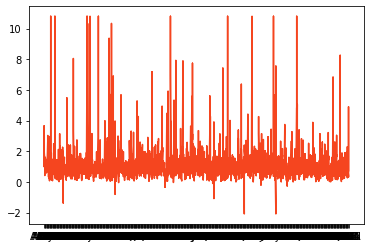

In [293]:
#Getting the book to market ratio
financialData['bookToMarketRatio'] = (financialData.totalassets - financialData.totalliabilities) / (financialData.originalprice * financialData.sharesoutstanding)
#Create a temporary dataset to work the information
financialDataBTMR = financialData
#Drop infinite data
financialDataBTMR['bookToMarketRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the .1% percentile high
largest = financialDataBTMR['bookToMarketRatio'].quantile(.999)
#And the low value as the 1% percentile low
lowest = financialDataBTMR['bookToMarketRatio'].quantile(.0001)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the .1% percentile biggest value
#and low values for the .1% percentile lowest value
financialDataBTMR = financialDataBTMR['bookToMarketRatio'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataBTMR = pd.DataFrame(financialDataBTMR)
#Drop Nas
financialDataBTMR = financialDataBTMR.reset_index().dropna()
#Plot of windsorized book to market ratio by firm 
plt.plot(financialDataBTMR.firm, financialDataBTMR.bookToMarketRatio, color='#F5451F')


In [294]:
financialDataBTMR.bookToMarketRatio.mean()

0.8807130848442689

**I decided to winsorize this information too so we can get a better interpretation, replacing the high values for the 1% percentile highest value and the low values by the 1% percentile lowest.**

**The mean of the book to market ratio of the whole history of every firm is 0.88 which means that most of the firms have a positive book to market value and that this value is around 0.88. A low ratio (less than 1) could indicate that the stock is undervalued, and a higher ratio (greater than 1) could mean the stock is overvalued. As we have less than one, investing in those who are under the media might be a bad idea, but in the other hand, we can see that there are many firms very promising too, as many are above the mean.**

**It is important to highlight that we have mostly positive values, so even if we risk it, we know that we are more likely to win money.**

##**Number 3**

**Finally we'll get the financial leverage that is the use of borrowed money (debt) to finance the purchase of assets with the expectation that the income or capital gain from the new asset will exceed the cost of borrowing.**

**For the short financial leverage we'll consider the following formula:**

- **Short financial leverage = short debt / total assets**

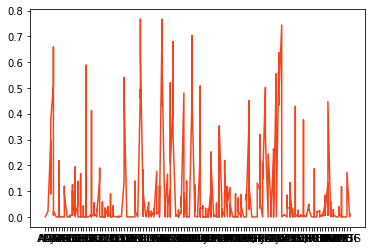

In [295]:
#Getting the short financial leverage
financialData['shortFinancialLeverage'] = financialData.shortdebt / financialData.totalassets
#Create a temporary dataset to plot the information
financialDataSFL = financialData
#Drop infinite data
financialDataSFL['shortFinancialLeverage'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the .1% percentile high
largest = financialDataSFL['shortFinancialLeverage'].quantile(.999)
#And the low value as the .1% percentile low
lowest = financialDataSFL['shortFinancialLeverage'].quantile(.0001)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the .1% percentile biggest value
#and low values for the .1% percentile lowest value
financialDataSFL = financialDataSFL['shortFinancialLeverage'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataSFL = pd.DataFrame(financialDataSFL)
#Drop Nas
financialDataSFL = financialDataSFL.reset_index().dropna()
#Plot of windsorized short financial leverage by firm 
plt.plot(financialDataSFL.firm, financialDataSFL.shortFinancialLeverage, color='#F5451F')


**As we can see, all the winsorized values of the whole history by firm are positive, which means that the management of this firms has adopted a very good approach towards the debt capital. This decreases the management decision making on earning per share.**

**And for the long financial leverage we'll consider the following formula:**

**Long financial leverage = long debt / total assets**

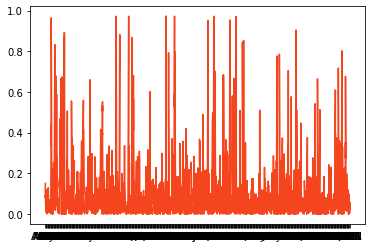

In [296]:
#Getting the long financial leverage
financialData['longFinancialLeverage'] = financialData.longdebt / financialData.totalassets
#Create a temporary dataset to plot the information
financialDataLFL = financialData
#Drop infinite data
financialDataLFL['longFinancialLeverage'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the 1% percentile high
largest = financialDataLFL['longFinancialLeverage'].quantile(.999)
#And the low value as the 1% percentile low
lowest = financialDataLFL['longFinancialLeverage'].quantile(.0001)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the 1% percentile biggest value
#and low values for the 1% percentile lowest value
financialDataLFL = financialDataLFL['longFinancialLeverage'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataLFL = pd.DataFrame(financialDataLFL)
#Drop Nas
financialDataLFL = financialDataLFL.reset_index().dropna()
#Plot of windsorized long financial leverage by firm 
plt.plot(financialDataLFL.firm, financialDataLFL.longFinancialLeverage, color='#F5451F')

In [297]:
financialDataLFL.longFinancialLeverage.mean()

0.09820293582745744

**Mary Girsch-Bock from The Ascent, says that a  financial leverage ratio of less than 1 is usually considered good by industry standards. A leverage ratio higher than 1 can cause a company to be considered a risky investment by lenders and potential investors, while a financial leverage ratio higher than 2 is cause for concern. The mean is 0.09, but in the graph we can see most firms lower than 2, therefore, here we can see a bias caused by the winsorization that give us the conclusion that more firms are not a good investment for their long financial leverage**

###**Calculate and explain earnings per share deflated by price.**

**This information of Earnings Per Share (EPS) helps us to know how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value.**

**The formula to get the EPS is the following:**

- **EPS = netincome / #SharesOutstanding** 

**And for the net income we will use:**
- **netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome** 

In [298]:
#first I got the EPS information
financialData['netincome'] = financialData.revenue - financialData.cogs - financialData.sgae - financialData.otheropexp - financialData.incometax - financialData.finexp + financialData.extraincome 
financialData['EPS'] = financialData.netincome / financialData.sharesoutstanding

**If we focus in EPSP which is the EPS divided by price we get the following:**

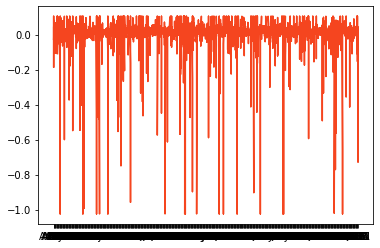

In [299]:
#EPSP + EPS / STOCK PRICE (ORIGINAL PRICE)
#Getting the EPSP
financialData['EPSP'] = financialData.EPS / financialData.originalprice
#Create a temporary dataset to plot the information
financialDataEPSP = financialData
#Drop infinite data
financialDataEPSP['EPSP'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the 1% percentile high
largest = financialDataEPSP['EPSP'].quantile(.99)
#And the low value as the .1% percentile low
lowest = financialDataEPSP['EPSP'].quantile(.001)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the .1% percentile biggest value
#and low values for the .1%percentile lowest value
financialDataEPSP = financialDataEPSP['EPSP'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataEPSP = pd.DataFrame(financialDataEPSP)
#Drop Nas
financialDataEPSP = financialDataEPSP.reset_index().dropna()
#Plot of windsorized long financial leverage by firm 
plt.plot(financialDataEPSP.firm, financialDataEPSP.EPSP, color='#F5451F')

In [300]:
financialDataEPSP.EPSP.mean()

0.013254364819079757

**As there are a few extremely high values, and a few very low, I decided to drop the outliers by using the technique of winsorizing, meaning that I substituted the high values for the 1% percentile biggest values and the low values for the 1% percentile lowest value. After winsorizing we end up with a highly fluctuating chart, at the end the meadia is positive, but focusing in the chart we can see that there are more negative values.**

**Negative earnings per share is not a bad signal, it only means that the company has negative accounting profits. Companies with negative earnings per share still have positive stock prices though. "That tells us the market is forward-looking – it's not looking at the current earnings but also future earnings."(Paulina Likos, 2020)**

#**2.2.2 About statistical modeling**

##**You have to select a group of firms according to their general industry classification:**

-Manufacturing industries

-Commercial industries (retail and wholesale)

-Service industries

##-**Financial services**

**For this analysis we will focus in Financial services, as it was the assigned to me**

## **Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.**

**By analizing the dataset, I descovered that financial services firms have as Sector Economatica value the Finance and Insurance atribbute, therefore, I decided to filter my firms this way in the steps before, so now we only have Finance an Insurance firms.**

In [301]:
#With this code we get the sector we want to focus
financialData 

q   revenue     cogs  sgae  otheropexp  extraincome  finexp  \
firm qdate                                                                      
AAME 2000Q1  2000q1       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q2  2000q2       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q3  2000q3       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q4  2000q4       NaN      NaN   NaN         NaN          NaN     NaN   
     2001Q1  2001q1       NaN      NaN   NaN         NaN          NaN     NaN   
...             ...       ...      ...   ...         ...          ...     ...   
ZION 2021Q2  2021q2  570000.0  15000.0   0.0         0.0    -100000.0     0.0   
     2021Q3  2021q3  569000.0  14000.0   0.0         0.0    -244000.0     0.0   
     2021Q4  2021q4  566000.0  13000.0   0.0         0.0    -284000.0     0.0   
     2022Q1  2022q1  555000.0  11000.0   0.0         0.0    -289000.0     0.0   
     2022Q2  2022q2  608000.0  15000.0   0.0         0.0    -333000.0     0.0   

             incometax  totalassets  totalliabilities  ...  \
firm qdate                                             ...   
AAME 2000Q1        NaN          NaN               NaN  ...   
     2000Q2        NaN          NaN               NaN  ...   
     2000Q3        NaN          NaN               NaN  ...   
     2000Q4        NaN          NaN               NaN  ...   
     2001Q1        NaN          NaN               NaN  ...   
...                ...          ...               ...  ...   
ZION 2021Q2   101000.0   87208000.0        79175000.0  ...   
     2021Q3    71000.0   88306000.0        80532000.0  ...   
     2021Q4    56000.0   93200000.0        85737000.0  ...   
     2022Q1    52000.0   91126000.0        84832000.0  ...   
     2022Q2    57000.0   87784000.0        82152000.0  ...   

             shortFinancialLeverage  longFinancialLeverage  netincome  \
firm qdate                                                              
AAME 2000Q1                     NaN                    NaN        NaN   
     2000Q2                     NaN                    NaN        NaN   
     2000Q3                     NaN                    NaN        NaN   
     2000Q4                     NaN                    NaN        NaN   
     2001Q1                     NaN                    NaN        NaN   
...                             ...                    ...        ...   
ZION 2021Q2                     NaN               0.014999   354000.0   
     2021Q3                     NaN               0.011551   240000.0   
     2021Q4                     NaN               0.010858   213000.0   
     2022Q1                     NaN               0.007561   203000.0   
     2022Q2                     NaN               0.007644   203000.0   

                  EPS      EPSP         r  new_sgae   new_rev   qdate  \
firm qdate                                                              
AAME 2000Q1       NaN       NaN       NaN       NaN       NaN  2000Q1   
     2000Q2       NaN       NaN       NaN       NaN       NaN  2000Q2   
     2000Q3       NaN       NaN       NaN       NaN       NaN  2000Q3   
     2000Q4       NaN       NaN       NaN       NaN       NaN  2000Q4   
     2001Q1       NaN       NaN       NaN       NaN       NaN  2001Q1   
...               ...       ...       ...       ...       ...     ...   
ZION 2021Q2  2.160966  0.040881  3.865836       0.0  570000.0  2021Q2   
     2021Q3  1.480837  0.023927  4.043881       0.0  569000.0  2021Q3   
     2021Q4  1.361340  0.021554  4.064594       0.0  566000.0  2021Q4   
     2022Q1  1.339277  0.020428  4.105692       0.0  555000.0  2022Q1   
     2022Q2  1.341184  0.026349  3.841823       0.0  608000.0  2022Q2   

            new_operatingMargin  
firm qdate                       
AAME 2000Q1                 NaN  
     2000Q2                 NaN  
     2000Q3                 NaN  
     2000Q4                 NaN  
     2001Q1                 NaN  
...                

###**Calculating the stock return**

**For this excercise I decided to work with anual returns, and the we will work with the continuously compounded return (r) formula:**

- **r = log(price t / price t-1)**

**In this case the t-1 will be the price this firm 1 quarters before**

In [302]:
#Group dataset by firm, get the actual adjusted price and the shift 4, for making it a year
financialData['r'] = np.log(financialData['adjprice'] - np.log(financialData['adjprice'].shift(4)))
#Showing results
financialData[['q', 'Name' ,'adjprice', 'r', 'shortdebt','totalassets']]

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


q                                        Name   adjprice  \
firm qdate                                                                   
AAME 2000Q1  2000q1                      Atlantic American Corp        NaN   
     2000Q2  2000q2                      Atlantic American Corp        NaN   
     2000Q3  2000q3                      Atlantic American Corp        NaN   
     2000Q4  2000q4                      Atlantic American Corp        NaN   
     2001Q1  2001q1                      Atlantic American Corp        NaN   
...             ...                                         ...        ...   
ZION 2021Q2  2021q2  Zions Bancorporation, National Association  51.206987   
     2021Q3  2021q3  Zions Bancorporation, National Association  60.369290   
     2021Q4  2021q4  Zions Bancorporation, National Association  61.968365   
     2022Q1  2022q1  Zions Bancorporation, National Association  64.653705   
     2022Q2  2022q2  Zions Bancorporation, National Association  50.546228   

                    r  shortdebt  totalassets  
firm qdate                                     
AAME 2000Q1       NaN        NaN          NaN  
     2000Q2       NaN        NaN          NaN  
     2000Q3       NaN        NaN          NaN  
     2000Q4       NaN        NaN          NaN  
     2001Q1       NaN        NaN          NaN  
...               ...        ...          ...  
ZION 2021Q2  3.865836        NaN   87208000.0  
     2021Q3  4.043881        NaN   88306000.0  
     2021Q4  4.064594        NaN   93200000.0  
     2022Q1  4.105692        NaN   91126000.0  
     2022Q2  3.841823        NaN   87784000.0  

[46276 rows x 6 columns]

**After we got the return values, it is important to see which variables are between the ratios variables are correlated to the return value. Therefore, I will run a correlation map that help us identify correlations with a coolwarm, so it is easier to identify**

In [303]:
corr = financialData[['operatingMargin','bookToMarketRatio','shortFinancialLeverage','longFinancialLeverage','EPSP','r']].corr()
corr.style.background_gradient(cmap='coolwarm')

,operatingMargin,bookToMarketRatio,shortFinancialLeverage,longFinancialLeverage,EPSP,r
operatingMargin,1.000000,0.006902,-0.016647,0.040766,0.082595,0.156422
bookToMarketRatio,0.006902,1.000000,0.032466,-0.040521,-0.220959,-0.277876
shortFinancialLeverage,-0.016647,0.032466,1.000000,-0.105097,0.087503,-0.040727
longFinancialLeverage,0.040766,-0.040521,-0.105097,1.000000,-0.004156,-0.021835
EPSP,0.082595,-0.220959,0.087503,-0.004156,1.000000,0.055161
r,0.156422,-0.277876,-0.040727,-0.021835,0.055161,1.000000


**With this plot we can see that the most significative variables that are related to the returns of the financial industry are 'operatingMargin', 'EPSP' and 'longFinancialLeverage'**

### **Do histograms for each factor/variables and interpret them**

**First, lets define the information we are going to use to do the histogram**

In [304]:
#Define information to get financial operating margin histogram
financialDataADJ = financialData[(financialData["operatingMargin"] < financialData["operatingMargin"].quantile(.975)) & (financialData["operatingMargin"] > financialData["operatingMargin"].quantile(.025))]
#Define information to get revenue histogram
financialDataRev = financialData[(financialData["EPSP"] < financialData["EPSP"].quantile(.975)) & (financialData["EPSP"] > financialData["EPSP"].quantile(.025))]
#Define information to get long Financial Leverage histogram
financialDataSgae = financialData[(financialData["longFinancialLeverage"] < financialData["longFinancialLeverage"].quantile(.975)) & (financialData["longFinancialLeverage"] > financialData["longFinancialLeverage"].quantile(.025))]

(array([2.1367e+04, 7.6100e+02, 3.6600e+02, 1.1100e+02, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.        , 0.29725456, 0.59450912, 0.89176368, 1.18901824,
        1.48627279, 1.78352735, 2.08078191, 2.37803647, 2.67529103,
        2.97254559]),
 <a list of 10 Patch objects>)

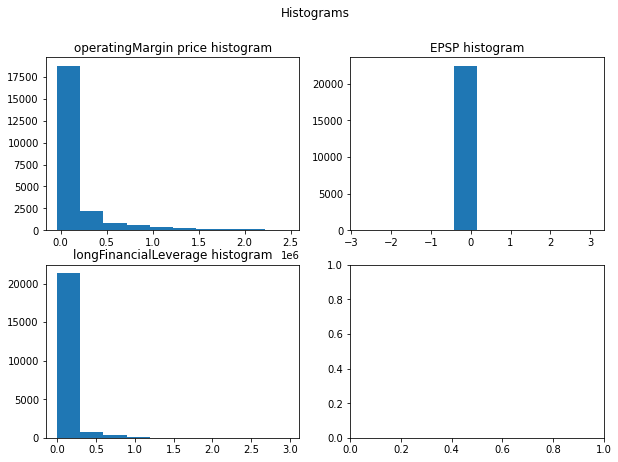

In [305]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Histograms')
#operating margin histogram
ax[0, 0].set_title('operatingMargin price histogram')
ax[0, 0].hist(financialDataADJ['operatingMargin'])
#EPSP histogram
ax[0, 1].set_title('EPSP histogram')
ax[0, 1].hist(financialDataOP['EPSP'])
#longFinancialLeverage histogram
ax[1, 0].set_title('longFinancialLeverage histogram')
ax[1, 0].hist(financialDataRev['longFinancialLeverage'])

**This histograms do not have a normal distribution, they are skewed to the right since most firms have high values of long financial leverage and operating margin.**

In this case, we can interpret that:
- Most firms (around 18,000) have an operating margin between 0 and 0.5. Then, only a few firms have an operating margin bigger 0.5.
- Around 20,000 firms have long financial leverage between 0 and 0.5 meaning that is a good definition to indicate the safety and security of a business.
- Almost all the firms (at least 20,000) have a EPSP between 0 and -1.  

As we have this right skewed distribution, we can work with the median, as it is the best measure of central tendency in this case.

###Do plots to visualize the possible relationship each factor might have with the dependent variable.

**To see the possible relationship of each factor with the returns, I decided to run a simple linear regression of each variable. If the linear regression helps me to predict the returns, it means it has a strong relationship, otherwise it means the relationship is weak**

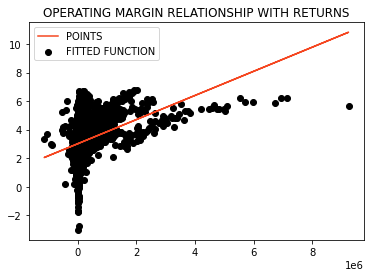

In [306]:
#operatingMargin RELATIONSHIP WITH RETURNS
#First we have to drop the nas so the linear regression works
financialDataRelationships = financialData.dropna()
#define dependant and independant variables
x = financialDataRelationships['operatingMargin'].values #independant
y = financialDataRelationships['r'].values #dependant
#adjusting the dataset to npy array so the regression works
elements = len(y)
x = x.reshape(elements, 1)
y = y.reshape(elements, 1)
#Creating and training the model
regr = linear_model.LinearRegression()
regr.fit(x, y)
#getting predictions for returns based on operatingMargin
y_prediction = regr.predict(x)
#plotting the results
plt.scatter(x, y,  color='black')
plt.plot(x, y_prediction, color='#F5451F')
plt.legend(['POINTS','FITTED FUNCTION'])
plt.title('OPERATING MARGIN RELATIONSHIP WITH RETURNS')
plt.show()

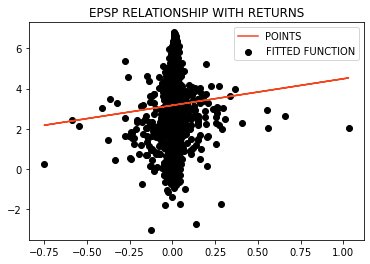

In [307]:
#EPSP RELATIONSHIP WITH RETURNS
#First we have to drop the nas so the linear regression works
financialDataRelationships = financialData.dropna()
#define dependant and independant variables
x = financialDataRelationships['EPSP'].values #independant
y = financialDataRelationships['r'].values #dependant
#adjusting the dataset to npy array so the regression works
elements = len(y)
x = x.reshape(elements, 1)
y = y.reshape(elements, 1)
#Creating and training the model
regr = linear_model.LinearRegression()
regr.fit(x, y)
#getting predictions for returns based on EPSP
y_prediction = regr.predict(x)
#plotting the results
plt.scatter(x, y,  color='black')
plt.plot(x, y_prediction, color='#F5451F')
plt.legend(['POINTS','FITTED FUNCTION'])
plt.title('EPSP RELATIONSHIP WITH RETURNS')
plt.show()

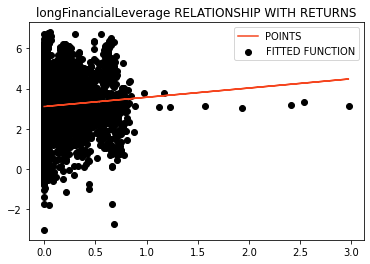

In [308]:
#longFinancialLeverage RELATIONSHIP WITH RETURNS
#First we have to drop the nas so the linear regression works
financialDataRelationships = financialData.dropna()
#define dependant and independant variables
x = financialDataRelationships['longFinancialLeverage'].values #independant
y = financialDataRelationships['r'].values #dependant
#adjusting the dataset to npy array so the regression works
elements = len(y)
x = x.reshape(elements, 1)
y = y.reshape(elements, 1)
#Creating and training the model
regr = linear_model.LinearRegression()
regr.fit(x, y)
#getting predictions for returns based on adjusted price
y_prediction = regr.predict(x)
#plotting the results
plt.scatter(x, y,  color='black')
plt.plot(x, y_prediction, color='#F5451F')
plt.legend(['POINTS','FITTED FUNCTION'])
plt.title('longFinancialLeverage RELATIONSHIP WITH RETURNS')
plt.show()

**After running a linear regression for adjusted operating margin, EPSP, and long financial leverage, we can clearly see that the one that help us to have better predictions for the return are the operating margin and the long financial leverage. Surprisely, even when the EPSP had a stronger correlation, it is less accurate than the operating margin. Also, the EPSP has a very weir distribution and it is clear that the correlation is not so strong with the returns as it does not help us to predict the returns.**

###Show descriptive statistics of these factors

In [309]:
financialData[['operatingMargin','bookToMarketRatio','shortFinancialLeverage','longFinancialLeverage','EPSP','r']].describe()

,operatingMargin,bookToMarketRatio,shortFinancialLeverage,longFinancialLeverage,EPSP,r
count,2.455400e+04,23931.000000,4975.000000,24725.000000,23806.000000,23118.000000
mean,3.285828e+05,0.884766,0.046902,0.098678,0.013913,2.973054
std,1.332848e+06,0.826608,0.119698,0.154880,0.105741,1.077881
min,-2.818500e+07,-2.744808,0.000000,0.000000,-9.193280,-4.650057
25%,1.184239e+04,0.522715,0.000000,0.016631,0.011981,2.341584
50%,4.502950e+04,0.777449,0.001192,0.049348,0.017665,2.955085
75%,1.659005e+05,1.033788,0.028523,0.111578,0.024031,3.563936
max,1.512800e+07,21.521522,0.790974,2.972546,3.051645,7.353143


**By using the describe function, we can extract a lot of information from our dataset. As it give us a preview of all variables and a synthesized information**

##Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

###Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size


**In this part I decided to group the firms by the quarter, then, divide it in 3 units percentile, so we get a good distribution for firms in this 3 groups**

In [310]:
#Function that recieves a dataset and divide it in 3 percentile of the firms divided by quarter 
def percentile(financialDataOHE):
    x = pd.DataFrame(financialDataOHE)
    p1 = 0 #0-3%percentile
    p2 = 3 #3-6%percentile
    p3 = 6 #6-9%percentile
    def percentile_(financialDataOHE):
        x = np.percentile(x)
        return p2
    percentilen = p2
    return percentilen

In [311]:
#Getting the information of the market
financialDataOHE = financialData
financialDataOHE = financialDataOHE.dropna().drop(columns='qdate')
financialDataOHE = financialDataOHE.reset_index()
#convert date column to datetime and subtract one week
financialDataOHE['date'] = pd.to_datetime(financialDataOHE['q'])
#Applying the percentile function to classify the data
financialDataOHE = financialDataOHE[['firm','Name','r','date','operatingMargin', 'longFinancialLeverage', 'EPSP']].sort_values(by='date',ascending=True)
financialDataOHE
#categorizing the dataset
categorize = pd.cut(np.array(financialDataOHE['r']), percentile(financialDataOHE), labels=["small", "medium", "big"]).dropna()
categorize
#adding the size parameter to the dataset
financialDataOHE['size'] = pd.DataFrame(categorize)
financialDataOHE

,firm,Name,r,date,operatingMargin,longFinancialLeverage,EPSP,size
3795,TROW,Price T Rowe Group Inc,2.089524,2000-01-01,130791.0,0.015669,0.015741,big
407,BEN,Franklin Resources Inc,1.369881,2000-01-01,172077.0,0.104122,0.017244,medium
3538,SEIC,SEI Investments Company,1.475755,2000-01-01,30552.0,0.111119,0.010112,medium
116,AMG,"Affiliated Managers Group, Inc",3.328940,2000-01-01,43935.0,0.277623,0.012974,medium
1605,FHI,"Federated Hermes, Inc",1.477717,2000-01-01,69922.0,0.575421,0.017071,medium
...,...,...,...,...,...,...,...,...
3096,PFSI,"Pennymac Financial Services, Inc",3.675163,2022-04-01,177526.0,0.000000,0.117722,medium
1519,ELV,"Elevance Health, Inc",6.166775,2022-04-01,2351000.0,0.209810,0.014208,big
4136,VIRT,"Virtu Financial, Inc",3.001970,2022-04-01,173784.0,0.179584,0.020851,medium
3204,PZN,"Pzena Investment Mngmt, Inc",1.443420,2022-04-01,24553.0,0.000000,0.022592,big


**To have a better view of the distribution of the firms, we can access to the dataframe ordered by size**

In [312]:
financialDataOHE.sort_values(by='size', ascending=False)

,firm,Name,r,date,operatingMargin,longFinancialLeverage,EPSP,size
2390,KKR,Kkr & Co. Inc,4.009304,2021-04-01,1144469.0,0.158425,0.038163,small
2236,ICE,"Intercontinental Exchange, Inc",4.843406,2022-01-01,992000.0,0.060862,0.008851,small
1374,EEFT,"Euronet Worldwide, Inc",4.175429,2016-04-01,59310.0,0.249397,0.015461,small
3520,SCU,"Sculptor Capital Mngmt, Inc",2.861297,2018-01-01,21552.0,0.399024,0.002640,small
3602,SEIC,SEI Investments Company,3.588422,2016-01-01,86812.0,0.000000,0.011000,small
...,...,...,...,...,...,...,...,...
4079,VALU,Value Line Inc,2.632700,2017-10-01,808.0,0.000000,0.011039,big
3314,RILY,"B. Riley Financial, Inc",2.277641,2017-10-01,14217.0,0.148434,-0.012760,big
3272,RGLD,"Royal Gold, Inc",4.301532,2017-10-01,40962.0,0.162899,-0.002747,big
1380,EEFT,"Euronet Worldwide, Inc",4.381869,2017-10-01,41119.0,0.131771,-0.005166,big


**Now, we will get a One Hot Encoder that will assign 0 and 1 to the qualitative information. The result of this encoding will leave our results as:**

- **Small will be 100**
- **Medium will be 010**
- **Big will be 001**




In [313]:
#We access the categorical size
categorical_columns = financialDataOHE[['size']]
categorical_columns
# Creating a label encoder objecr
le = preprocessing.LabelEncoder()
# Categorizing the column values with number
categorical_columns = categorical_columns.apply(le.fit_transform)
categorical_columns
#Making the One Hot Encoding 
enc = preprocessing.OneHotEncoder()
enc.fit(categorical_columns)
one_hot_labels = enc.transform(categorical_columns).toarray()
one_hot_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [314]:
#Assigned categorical values
categorical_column_names = enc.get_feature_names_out(list(categorical_columns.columns))
categorical_column_names
categorical_columns_df = pd.DataFrame(one_hot_labels, columns = categorical_column_names)
categorical_columns_df.head()

,size_0,size_1,size_2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


**Now, we will try a Dummification, also known as Get Dummies, so we can classify our data in binaries with a base case. For this excercise the base case will be small, and thanks to the One hot Encoder we can get this result only by dropping the small column so our data will pass from:**

- **Small as 000**
- **Medium as 010**
- **Big as 001**

**to:**

- **Small as 00**
- **Medium as 10**
- **Big as 01**

In [315]:
#Unifiying the dataset
sample_train_data = financialDataOHE.drop(columns = categorical_columns.columns)
sample_train_data = financialDataOHE.join(categorical_columns_df)
#Leaving data in Dummification mode
sample_train_data = sample_train_data.drop(columns=['size','size_0'])
#I make a copy for the winsorization
copyReg = sample_train_data
#Results
sample_train_data

,firm,Name,r,date,operatingMargin,longFinancialLeverage,EPSP,size_1,size_2
3795,TROW,Price T Rowe Group Inc,2.089524,2000-01-01,130791.0,0.015669,0.015741,1.0,0.0
407,BEN,Franklin Resources Inc,1.369881,2000-01-01,172077.0,0.104122,0.017244,1.0,0.0
3538,SEIC,SEI Investments Company,1.475755,2000-01-01,30552.0,0.111119,0.010112,1.0,0.0
116,AMG,"Affiliated Managers Group, Inc",3.328940,2000-01-01,43935.0,0.277623,0.012974,1.0,0.0
1605,FHI,"Federated Hermes, Inc",1.477717,2000-01-01,69922.0,0.575421,0.017071,1.0,0.0
...,...,...,...,...,...,...,...,...,...
3096,PFSI,"Pennymac Financial Services, Inc",3.675163,2022-04-01,177526.0,0.000000,0.117722,0.0,0.0
1519,ELV,"Elevance Health, Inc",6.166775,2022-04-01,2351000.0,0.209810,0.014208,0.0,0.0
4136,VIRT,"Virtu Financial, Inc",3.001970,2022-04-01,173784.0,0.179584,0.020851,1.0,0.0
3204,PZN,"Pzena Investment Mngmt, Inc",1.443420,2022-04-01,24553.0,0.000000,0.022592,1.0,0.0


###**First I decided to fun a Linear Multiple regression model with the high corretional values**

###**Multiple regression model**

In [316]:
#Multivariate Linear Regression 
#First we have to drop the Nas
financialDataML = financialData.dropna()
#Setting independant variables
X = financialDataML[['operatingMargin', 'longFinancialLeverage', 'EPSP']].reset_index().drop(columns=['firm','qdate'])
#Setting dependant variable
y = financialDataML['r'].reset_index().drop(columns=['firm','qdate'])

In [317]:
#Creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [318]:
#Instancing model
model = LinearRegression()
#Fitting model
model.fit(X_train,y_train)
#Making predictions based in X test
predictions = model.predict(X_test)

In [319]:
#Obtaining R^2 (coefficient of determination) regression score function.
r2_score(y_test, predictions)

0.10941206753323796

**R-squared is the proportion of variance in the dependent variable that can be explained by the independent variable. The result of the training model is 0.10 which considered a very bad model for being a linear regression. Any R2 value less than 1.0 indicates that at least some variability in the data cannot be accounted for by the model in this case an R2 of 0.1 indicates that only 10% of the variability in the outcome data cannot be explained by the model)**

**Now, I will get the accuracy of the model**

In [320]:
model.score(X,y)

0.1218078443405427

**The result is 0.12. This means that the model could give a good prediction for over the half of the values. It is not the best one, but is a good model for being linear and have many variance between variables.**

###**Now, I'm going to run an Ordinary Least Squares Regression model with the high correltional values and the firm sizes variables too**

In [321]:
#define response variable
y = sample_train_data['r']
#define predictor variables
x = sample_train_data[['size_1','size_2','operatingMargin', 'longFinancialLeverage', 'EPSP']]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.92e-119
Time:                        20:03:56   Log-Likelihood:                -6956.1
No. Observations:                4298   AIC:                         1.392e+04
Df Residuals:                    4292   BIC:                         1.396e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.93

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###**Interpret the R-squared of the model**
**this model R-squared is also around 0.52, as is also under 1.0 this model indicates that there is a variability in the data of at least 90% that cannot be accounted or explained by the model**

###**Model interpretation**
**the size is interpreted in dummy variables, having small ones as base category, therefore it would look like this:**
- Small = 00
- Medium = 10
- Big = 01

**Looking at the coef we can see that the effect of the variables choosen for interpreting the model, medium firms offer 0.2% returns and the considered big firms offer a 0.4% return.**

**Considering the size of the firms in based on the adjusted price the average change of stock returns is 0.009 which means is a 0.9%**

###**Beta interpretation**

**The t-test assesses whether the beta coefficient is significantly different from zero.  If the beta coefficient is not statistically significant, the variable does not significantly predict the outcome.**

**If the beta coefficient is positive, the interpretation is that for every 1-unit increase in the predictor variable, the outcome variable will increase by the beta coefficient value.  If the beta coefficient is negative, the interpretation is that for every 1-unit increase in the predictor variable, the outcome variable will decrease by the beta coefficient value.**

**The betas we got are:**
- b0 = 2.937
- b1 = -0.017
- b2 = -0.951
- b3 = 8.4e-7
- b4 = 0.455
- b5 = 0.647

**Which means that if the beta 4 that is adjusted price with a coeficient of  .008 and a statistically significant t of 23, then for each 1-unit increase in the predictor variable, the outcome variable will increase by .08 units.The beta coefficient is the degree of change in the outcome variable for every 1-unit of change in the predictor variable**

###For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

By the summary we can se outlier values in the operating margin variable, we can use again the winsorization method to adjust our model. So we are going to replace the high values for the 1% percentile value and the low values for the 1% percentile lowest value:

In [322]:
#Create a temporary dataset to modify the information
financialDataRev = financialData
#Drop infinite data
financialDataRev['operatingMargin'].replace([np.inf, -np.inf], np.nan, inplace=True)
#As we have many outliers, we have to adjust the model to get a better interpretation
#To do this we set max value as the 1% percentile high
largest = financialDataRev['operatingMargin'].quantile(.99)
#And the low value as the 1% percentile low
lowest = financialDataRev['operatingMargin'].quantile(.01)
#To handle the outliers I decided to windsorize the information
#For doing this, there is a Pandas function called clip, that replaces large values for the 1% percentile biggest value
#and low values for the 1%percentile lowest value
financialDataRev = financialDataRev['operatingMargin'].clip(largest,lowest)
#As clip let us with a np array, we have to reshape it
financialDataRev = pd.DataFrame(financialDataRev)
#Reset index
financialDataRev = financialDataRev.reset_index()
financialDataRev = financialDataRev.drop(columns=['firm','qdate'])
financialDataRev

,operatingMargin
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
46271,555000.0
46272,555000.0
46273,553000.0
46274,544000.0


In [323]:
#Replacing infinites in original dataset
financialData.replace([np.inf, -np.inf], np.nan, inplace=True)
#Adding the new values of extreme outliers as a new column in the model
financialData['new_operatingMargin'] = financialDataRev['operatingMargin'].to_numpy()
#Droping Nas
financialData.dropna()

q  revenue  cogs     sgae  otheropexp  extraincome   finexp  \
firm qdate                                                                      
AC   2016Q4  2016q4  16295.0   0.0  16163.0         0.0      -5392.0 -10010.0   
     2017Q1  2017q1   4987.0   0.0   9319.0         0.0      -4956.0  12214.0   
     2017Q2  2017q2   5095.0   0.0  11548.0         0.0        -30.0 -10769.0   
     2017Q3  2017q3   5248.0   0.0  11360.0         0.0        186.0  -7512.0   
     2017Q4  2017q4  11585.0   0.0  15074.0         0.0        731.0 -24805.0   
...             ...      ...   ...      ...         ...          ...      ...   
WHG  2021Q2  2021q2  17484.0   0.0  16706.0         0.0        403.0   -235.0   
     2021Q3  2021q3  17860.0   0.0  15816.0         0.0        185.0   -131.0   
     2021Q4  2021q4  19391.0   0.0  17023.0         0.0        539.0   -306.0   
     2022Q1  2022q1  17216.0   0.0  16801.0         0.0        195.0     16.0   
     2022Q2  2022q2  15603.0   0.0  16001.0         0.0        -65.0     -5.0   

             incometax  totalassets  totalliabilities  ...  \
firm qdate                                             ...   
AC   2016Q4     1103.0     952603.0           78581.0  ...   
     2017Q1    -8424.0     917633.0           35802.0  ...   
     2017Q2     -310.0     926837.0           39917.0  ...   
     2017Q3       67.0     979519.0           81311.0  ...   
     2017Q4     6247.0    1006915.0           88768.0  ...   
...                ...          ...               ...  ...   
WHG  2021Q2      446.0     152264.0           17588.0  ...   
     2021Q3      481.0     135262.0           19534.0  ...   
     2021Q4      400.0     139605.0           21699.0  ...   
     2022Q1      544.0     131016.0           13756.0  ...   
     2022Q2      -80.0     129925.0           14207.0  ...   

             shortFinancialLeverage  longFinancialLeverage  netincome  \
firm qdate                                                              
AC   2016Q4                0.000000               0.000000     3647.0   
     2017Q1                0.000000               0.000000   -13078.0   
     2017Q2                0.000000               0.000000     4596.0   
     2017Q3                0.000000               0.000000     1519.0   
     2017Q4                0.000000               0.000000    15800.0   
...                             ...                    ...        ...   
WHG  2021Q2                0.009293               0.000000      970.0   
     2021Q3                0.010424               0.000000     1879.0   
     2021Q4                0.010093               0.000000     2813.0   
     2022Q1                0.000000               0.033851       50.0   
     2022Q2                0.011537               0.031156     -378.0   

                  EPS      EPSP         r  new_sgae  new_rev   qdate  \
firm qdate                                                             
AC   2016Q4  0.143916  0.004381  3.346648   16163.0  16295.0  2016Q4   
     2017Q1 -0.539295 -0.014918  3.459122    9319.0   4987.0  2017Q1   
     2017Q2  0.192590  0.005664  3.393638   11548.0   5095.0  2017Q2   
     2017Q3  0.063652  0.001783  3.440954   11360.0   5248.0  2017Q3   
     2017Q4  0.666621  0.019549  3.395644   15074.0  11585.0  2017Q4   
...               ...       ...       ...       ...      ...     ...   
WHG  2021Q2  0.116910  0.005373  2.802650   16706.0  17484.0  2021Q2   
     2021Q3  0.225581  0.011873  2.785345   15816.0  17860.0  2021Q3   
     2021Q4  0.338710  0.019995  2.645646   17023.0  19391.0  2021Q4   
     2022Q1  0.005829  0.000380  2.536694   16801.0  17216.0  2022Q1   
     2022Q2 -0.044066 -0.003193  2.384173   16001.0  15603.0  2022Q2   

            new_operatingMargin  
firm qdate                       
AC   2016Q4               132.0  
     2017Q1             -4332.0  
     2017Q2             -6453.0  
     2017Q3             -6112.0  
     2017Q4             -3489.0  
...                         ... 

**And DONE, we have our dataset with the new 2 values with more outliers winsorized by the 1% percentile **


###You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

**To calculate the multicollinearity I used a VIF function that will help us know the variance inflation factor, in statistics is used to knok the severity of multicollinearity in the ordinary least square (OLS) regression analysis. Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable**

In [324]:
corr = financialData[['new_operatingMargin','longFinancialLeverage','EPSP']].corr()
corr.style.background_gradient(cmap='coolwarm')

,new_operatingMargin,longFinancialLeverage,EPSP
new_operatingMargin,1.000000,0.048074,0.045690
longFinancialLeverage,0.048074,1.000000,-0.004156
EPSP,0.045690,-0.004156,1.000000


In [325]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    #features
    for feature in features:
        # extract all the other features to regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared 
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})/5

In [326]:
calculate_vif(df=financialData.dropna(), features=['new_operatingMargin','longFinancialLeverage','EPSP'])

,VIF,Tolerance
new_operatingMargin,0.201165,0.198841
longFinancialLeverage,0.200308,0.199693
EPSP,0.201451,0.198559


**Adjusted price and original price have a strong multicollinearity, as this independent variables in are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. As we can see in the heat map and in the VIF, there are not variable with strong correlation.**

##**Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from the model. You have to run and interpret your final model.**

**I decided to drop the size variables because in the OLS they had the lowest t value, which means that the size of the firm does not affect the returns of the firm, and now I worwed with the winsorized data**

In [327]:
financialDataFinal = financialData.dropna()
#define response variable
y = financialDataFinal['r']
#define predictor variables
x = financialDataFinal[['new_operatingMargin','longFinancialLeverage','EPSP']]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     202.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          9.02e-123
Time:                        20:03:56   Log-Likelihood:                -6953.3
No. Observations:                4298   AIC:                         1.391e+04
Df Residuals:                    4294   BIC:                         1.394e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.92

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**As we can see our model incremented the accuracy in 0.02, but the new data is still too large, for now we will leave the dataset and hopefuly will continue updating to get better results, with a more advanced model and more Machine Learning tools**